<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 8 Oktober 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Oktober 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [116]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [117]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Graduate Admission 2** (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap kualitas dari suatu Red Wine yang diukur dengan angka 0 sampai dengan 10 (Quality).

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **Quality**: Variabel keluaran (berdasarkan data sensori, skor antara 0 dan 10).









### Deskripsi Dataset Regresi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap besarnya peluang (Chance of Admit) dari seorang pelamar untuk diterima pada program Magister-nya di daerah India.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:



*   **GRE Scores (out of 340)**: Skor yang diperoleh oleh calon pelamar pada tes GRE.
*   **TOEFL Scores (out of 120)**: Skor yang diperoleh oleh calon pelamar pada tes TOEFL.
*   **University Rating (out of 5)**: Rating universitas yang didaftar oleh calon pelamar.
*  **Statement of Purpose and Letter of Recommendation Strength (out of 5)**: Skor yang diperoleh dari surat rekomendasi yang dilampirkan oleh calon pelamar.
*   **Undergraduate GPA (out of 10)**: GPA yang diperoleh oleh calon pelamar pada saat masa *undergraduate*.
*   **Research Experience (either 0 or 1)**: Ada/tidaknya pengalaman meneliti yang dimiliki oleh calon pelamar. 0 berarti tidak, 1 berarti iya.
*   **Chance of Admit (ranging from 0 to 1)**: Peluang diterimanya calon pelamar pada suatu universitas dengan skor-skor yang dimilikinya.

## Import Libraries

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Red Wine

**Terapkan proses Read Dataset di bawah cell ini**

In [119]:
red_wine = pd.read_csv("Red_Wine_Quality_Train.csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3461,8.285252,1.017603,0.020000,3.385252,0.083945,6.000000,11.009217,0.998893,3.480645,0.491290,10.990322,3
3462,7.500000,0.600000,0.030000,1.800000,0.095000,25.000000,99.000000,0.995000,3.350000,0.540000,10.100000,5
3463,7.873784,0.350633,0.458011,3.585536,0.077837,15.036160,37.117519,0.997249,3.353345,0.858915,12.810848,8
3464,10.700000,0.350000,0.530000,2.600000,0.070000,5.000000,16.000000,0.997200,3.150000,0.650000,11.000000,8


### Dataset Admission Prediction

In [120]:
admission = pd.read_csv("Admission_Prediction_Train.csv")
admission

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,5,6,330,115,5,4.5,3.0,9.34,1,0.90
1,116,117,299,102,3,4.0,3.5,8.62,0,0.56
2,45,46,322,110,5,5.0,4.0,9.10,1,0.88
3,16,17,317,107,3,4.0,3.0,8.70,0,0.66
4,462,463,307,105,4,3.0,3.0,7.94,0,0.62
...,...,...,...,...,...,...,...,...,...,...
345,106,107,329,111,4,4.5,4.5,9.18,1,0.87
346,270,271,306,105,2,2.5,3.0,8.22,1,0.72
347,348,349,302,99,1,2.0,2.0,7.25,0,0.57
348,435,436,309,105,2,2.5,4.0,7.68,0,0.55


**Terapkan proses Read Dataset di bawah cell ini**

## SOAL 1 Data Pre-processing [20]

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Red Wine & Admission Prediction) hingga dataset terbagi menjadi train dan test**

### Dataset Red Wine

**Terapkan proses data pre-processing di bawah cell ini**

In [121]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
red_wine.duplicated().sum()

242

In [123]:
red_wine = red_wine.drop_duplicates()

<Axes: >

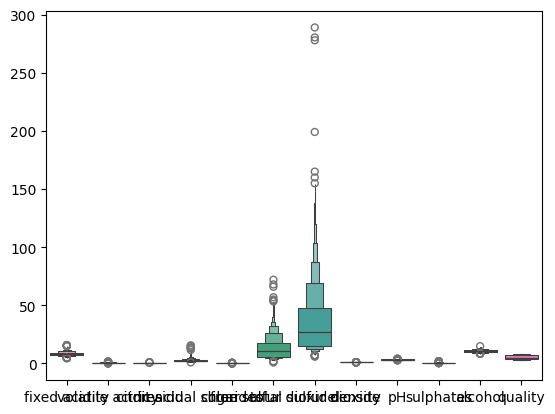

In [124]:
sns.boxenplot(red_wine)

<Axes: >

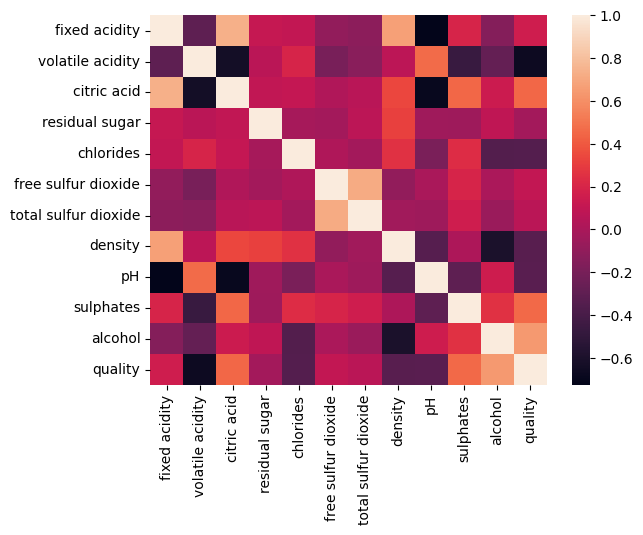

In [125]:
sns.heatmap(red_wine.corr())

In [126]:
red_wine_variable = red_wine.drop('quality', axis = 1)
red_wine_quality = red_wine['quality']
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(red_wine_variable, red_wine_quality, test_size=0.25)

### Dataset Admission Prediction

**Terapkan proses data pre-processing di bawah cell ini**

In [127]:
#CODE HERE
admission.isnull().sum()

Unnamed: 0           0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [128]:
admission.duplicated().sum()

0

<Axes: >

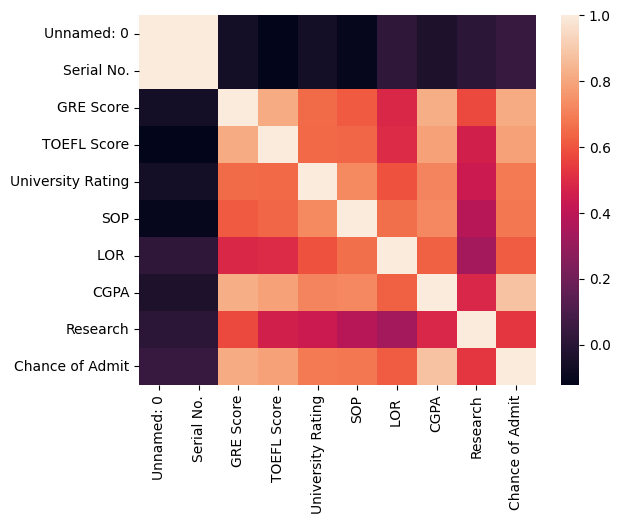

In [129]:
sns.heatmap(admission.corr())

<Axes: >

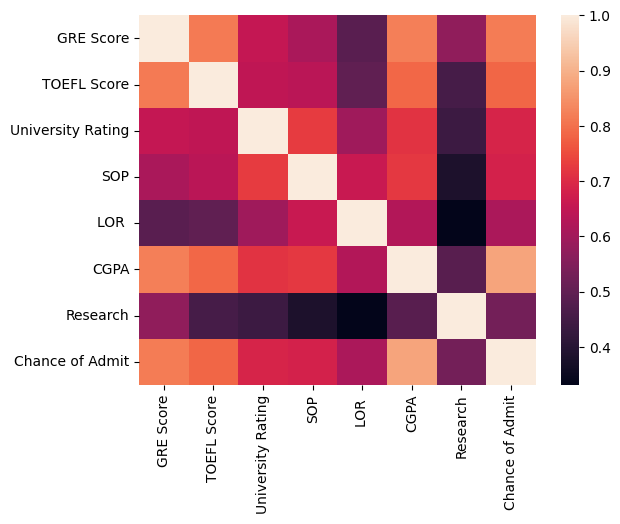

In [130]:
admission = admission.drop('Serial No.', axis=1)
admission = admission.drop('Unnamed: 0', axis=1)
sns.heatmap(admission.corr())

<Axes: >

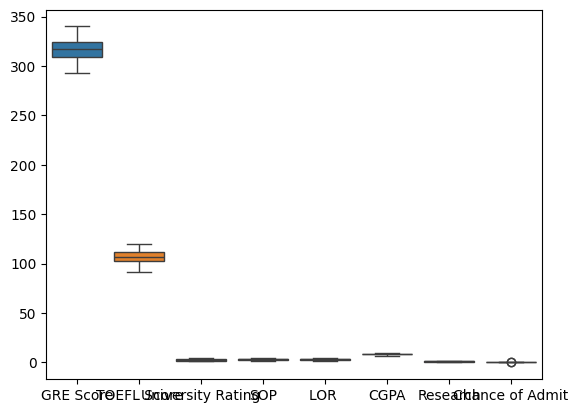

In [131]:
sns.boxplot(admission)

In [132]:
admission_variable = admission.drop('Chance of Admit', axis=1)
admission_chance = admission['Chance of Admit']
X_train_admission, X_test_admission, y_train_admission, y_test_admission = train_test_split(admission_variable, admission_chance, test_size=0.25)

## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [133]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [134]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))


##### Dataset Red Wine

In [135]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtc_red = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_red.fit(X_train_red, y_train_red)

DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Admission Prediction

In [136]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtr_admission = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_admission.fit(X_train_admission, y_train_admission)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Red Wine

In [137]:
# Memprediksi data testing
prediction = dtc_red.predict(X_test_red)

# Call the metrics function
classification_metrics(prediction, y_test_red)

Accuracy: 0.5086848635235732
F1 Score: 0.43329704470358626
Recall Score: 0.49529755408492054
Precision Score: 0.44791290690900265


c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Dataset Admission Prediction

In [138]:
# Memprediksi data testing
prediction = dtr_admission.predict(X_test_admission)

# Call the metrics function
regression_metrics(prediction, y_test_admission)

MAE: 0.0549797263976671
MSE: 0.005125988351233346
RMSE: 0.07159600792804963
R_squared: 0.6830046005943634


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [139]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dtr_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr_md6.fit(X_train_admission, y_train_admission)

# Memprediksi data testing
predicted6 = dtr_md6.predict(X_test_admission)

# Menampilkan metrics evaluasi
regression_metrics(predicted6, y_test_admission)

MAE: 0.05389567466104899
MSE: 0.0057683955372006745
RMSE: 0.07594995416193925
R_squared: 0.6432776038586476


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 0.04837917276086966 dan *RMSE* 0.06888923287937174. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 0.049144375215427846 dan *RMSE* 0.0704508435958617

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Admission Prediction tanpa max depth:

In [140]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_admission, y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X_train_admission.columns).array))

|--- CGPA <= 8.65
|   |--- CGPA <= 8.03
|   |   |--- TOEFL Score <= 100.50
|   |   |   |--- SOP <= 2.75
|   |   |   |   |--- CGPA <= 7.64
|   |   |   |   |   |--- GRE Score <= 300.50
|   |   |   |   |   |   |--- SOP <= 1.75
|   |   |   |   |   |   |   |--- University Rating <= 1.50
|   |   |   |   |   |   |   |   |--- GRE Score <= 296.00
|   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |   |--- GRE Score >  296.00
|   |   |   |   |   |   |   |   |   |--- value: [0.53]
|   |   |   |   |   |   |   |--- University Rating >  1.50
|   |   |   |   |   |   |   |   |--- GRE Score <= 296.50
|   |   |   |   |   |   |   |   |   |--- value: [0.47]
|   |   |   |   |   |   |   |   |--- GRE Score >  296.50
|   |   |   |   |   |   |   |   |   |--- value: [0.44]
|   |   |   |   |   |   |--- SOP >  1.75
|   |   |   |   |   |   |   |--- CGPA <= 7.42
|   |   |   |   |   |   |   |   |--- value: [0.42]
|   |   |   |   |   |   |   |--- CGPA >  7.42
|   |   |   |   |   |   | 

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [141]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(X_train_admission, y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(X_train_admission.columns).array))

|--- CGPA <= 8.65
|   |--- CGPA <= 8.03
|   |   |--- TOEFL Score <= 100.50
|   |   |   |--- SOP <= 2.75
|   |   |   |   |--- value: [0.52]
|   |   |   |--- SOP >  2.75
|   |   |   |   |--- value: [0.41]
|   |   |--- TOEFL Score >  100.50
|   |   |   |--- GRE Score <= 319.50
|   |   |   |   |--- value: [0.59]
|   |   |   |--- GRE Score >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- CGPA >  8.03
|   |   |--- GRE Score <= 319.50
|   |   |   |--- CGPA <= 8.25
|   |   |   |   |--- value: [0.63]
|   |   |   |--- CGPA >  8.25
|   |   |   |   |--- value: [0.68]
|   |   |--- GRE Score >  319.50
|   |   |   |--- GRE Score <= 324.50
|   |   |   |   |--- value: [0.77]
|   |   |   |--- GRE Score >  324.50
|   |   |   |   |--- value: [0.65]
|--- CGPA >  8.65
|   |--- CGPA <= 9.05
|   |   |--- CGPA <= 8.95
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.70]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.77]
|   |   |--- CGPA >  8.95
|   |   |   |--- LOR  <= 3

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

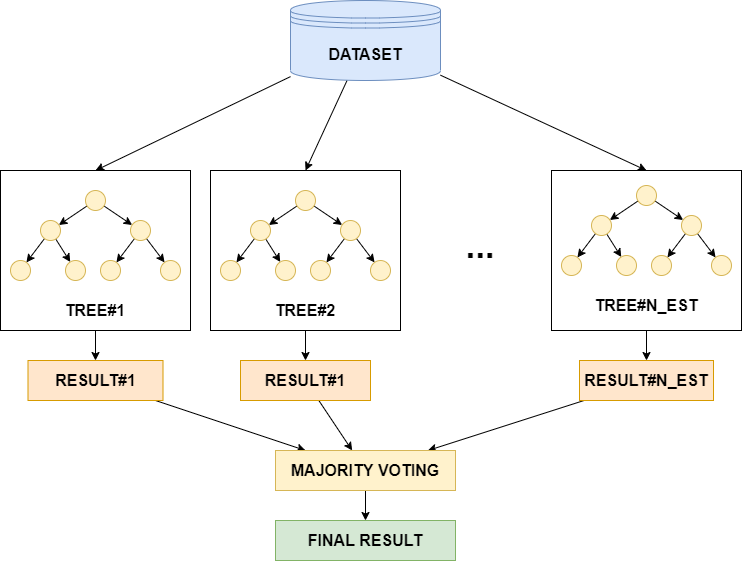

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [142]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train_admission, y_train_admission)

# Memprediksi data testing
predicted = rf_md.predict(X_test_admission)

# Menampilkan metrics
regression_metrics(predicted, y_test_admission)

MAE: 0.04932272727272726
MSE: 0.004228640227272726
RMSE: 0.06502799571932635
R_squared: 0.7384973577896374


In [143]:
rf_red_paramless = RandomForestClassifier()
rf_red_paramless.fit(X_train_red, y_train_red)

predicted = rf_red_paramless.predict(X_test_red)

classification_metrics(predicted, y_test_red)

Accuracy: 0.8039702233250621
F1 Score: 0.7775216745096242
Recall Score: 0.7867697116334513
Precision Score: 0.7778887989633256


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [144]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train_admission, y_train_admission)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [145]:
clf.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 10}

In [146]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_train_admission, y_train_admission)
predicted = best_hp.predict(X_test_admission)
regression_metrics(predicted, y_test_admission)

MAE: 0.05176136363636364
MSE: 0.004979261363636364
RMSE: 0.07056388143828515
R_squared: 0.6920783200119466


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/competitions/lab-4-regression-case?rvi=1)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/lab-4-klasifikasi-kualitas-wine)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.


# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 4`
- `random_state = 2023`.

In [161]:
#CODE HERE
dt_red = DecisionTreeClassifier(max_depth=4, random_state=2023)
dt_admission = DecisionTreeRegressor(max_depth=4, random_state=2023)
dt_red.fit(X_train_red, y_train_red)
dt_admission.fit(X_train_admission, y_train_admission)

DecisionTreeRegressor(max_depth=4, random_state=2023)

### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) yang didapat pada soal 1a!

In [164]:
# CODE HERE
print(tree.export_text(dt_red, feature_names=pd.Series(X_train_red.columns).array))
print('\nseparator\n')
print(tree.export_text(dt_admission, feature_names=pd.Series(X_train_admission.columns).array))


|--- sulphates <= 0.64
|   |--- volatile acidity <= 0.75
|   |   |--- alcohol <= 9.10
|   |   |   |--- fixed acidity <= 8.73
|   |   |   |   |--- class: 4
|   |   |   |--- fixed acidity >  8.73
|   |   |   |   |--- class: 3
|   |   |--- alcohol >  9.10
|   |   |   |--- alcohol <= 10.10
|   |   |   |   |--- class: 5
|   |   |   |--- alcohol >  10.10
|   |   |   |   |--- class: 4
|   |--- volatile acidity >  0.75
|   |   |--- chlorides <= 0.08
|   |   |   |--- total sulfur dioxide <= 32.54
|   |   |   |   |--- class: 4
|   |   |   |--- total sulfur dioxide >  32.54
|   |   |   |   |--- class: 3
|   |   |--- chlorides >  0.08
|   |   |   |--- total sulfur dioxide <= 18.93
|   |   |   |   |--- class: 3
|   |   |   |--- total sulfur dioxide >  18.93
|   |   |   |   |--- class: 4
|--- sulphates >  0.64
|   |--- alcohol <= 11.00
|   |   |--- alcohol <= 9.92
|   |   |   |--- total sulfur dioxide <= 48.82
|   |   |   |   |--- class: 3
|   |   |   |--- total sulfur dioxide >  48.82
|   |   |   |

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Chance of Admit 0.96, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Chance of Admit` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

In [149]:
#CODE HERE

### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu red wine yang paling berpotensi untuk dikategorikan sebagai kelas 4. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, cantumkanlah semua kemungkinan pasangan atribut tersebut.

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

In [150]:
#CODE HERE

## SOAL 3 [15]

### SOAL 3a

[5] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Admission Prediction dan Random Forest Classifier untuk Red Wine) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 3`
- `random_state = 2023`

In [171]:
#CODE HERE
rf_red = RandomForestClassifier(max_depth=3, random_state=2023)
rf_admission = RandomForestRegressor(max_depth=3, random_state=2023)
rf_red.fit(X_train_red,y_train_red)
rf_admission.fit(X_train_admission, y_train_admission)

RandomForestRegressor(max_depth=3, random_state=2023)

### SOAL 3b

[5] Model Random Forest dianggap kurang dapat diinterpretasikan dibandingkan dengan Decision Tree. Apakah penyebab dari hasil tersebut?

In [152]:
#CODE HERE

### SOAL 3c

[5] Mekanisme voting dalam Random Forest Classifier adalah cara di mana model ini membuat prediksi akhir berdasarkan hasil dari beberapa Decision Tree yang membentuk ensemble-nya. Apakah yang membedakan mekanisme ini dengan mekanisme pengambil keputusan pada Decision Tree Classifier?

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Admission Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [166]:
#CODE HERE
print("DT")
predicted = dt_admission.predict(X_test_admission)
regression_metrics(predicted, y_test_admission)

DT
MAE: 0.0534516485550943
MSE: 0.004909538342228911
RMSE: 0.07006809789218564
R_squared: 0.6963900498685909


In [167]:
print("RF")
predicted = rf_admission.predict(X_test_admission)
regression_metrics(predicted, y_test_admission)

RF
MAE: 0.04763028291771774
MSE: 0.004184897106043572
RMSE: 0.06469078068815967
R_squared: 0.7412024689282433


## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Red Wine Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [169]:
#CODE HERE
print("DT")
predicted = dt_red.predict(X_test_red)
classification_metrics(predicted, y_test_red)

DT
Accuracy: 0.5372208436724566
F1 Score: 0.4678357092613827
Recall Score: 0.5132846298346972
Precision Score: 0.44005802016339174


c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
print("RF")
predicted = rf_red.predict(X_test_red)
classification_metrics(predicted, y_test_red)

RF
Accuracy: 0.6240694789081885
F1 Score: 0.5767735816085335
Recall Score: 0.6033336693766528
Precision Score: 0.592947904391712


## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [173]:
#CODE HERE
param_grid_reg_classifier = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'min_samples_split': [ 1, 2, 5, 10, 15], 
    'max_depth': [None, 1, 4, 8, 12]
}

param_grid_rf_classifier = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 4, 8, 12],
    'min_samples_split': [ 1, 2, 5, 10, 15]
}


grid_search_rf_adm = GridSearchCV(RandomForestRegressor(random_state=2023), param_grid_reg_classifier, cv=5)
grid_search_rf_red = GridSearchCV(RandomForestClassifier(random_state=2023), param_grid_rf_classifier, cv=5)
grid_search_dt_adm = GridSearchCV(DecisionTreeRegressor(random_state=2023), param_grid_reg_classifier, cv=5)
grid_search_dt_red = GridSearchCV(DecisionTreeClassifier(random_state=2023), param_grid_rf_classifier, cv=5)

grid_search_rf_adm.fit(X_train_admission, y_train_admission)
grid_search_rf_red.fit(X_train_red, y_train_red)
grid_search_dt_adm.fit(X_train_admission, y_train_admission)
grid_search_dt_red.fit(X_train_red, y_train_red)

c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-package

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 4, 8, 12],
                         'min_samples_split': [1, 2, 5, 10, 15]})

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 5a.

In [174]:
#CODE HERE
print("Best RF Regresson", grid_search_rf_adm.best_params_)
print("Best RF Classifier", grid_search_rf_red.best_params_)
print("Best DT Regresson", grid_search_dt_adm.best_params_)
print("Best DF Classifier", grid_search_dt_red.best_params_)

Best RF Regresson {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_split': 2}
Best RF Classifier {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 2}
Best DT Regresson {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_split': 10}
Best DF Classifier {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [176]:
#CODE HERE
best_rf_reg = RandomForestRegressor(
    criterion='absolute_error',
    max_depth=4,
    min_samples_split=2
)

best_rf_clf = RandomForestClassifier(
    criterion='gini',
    max_depth=12,
    min_samples_split=2
)

best_dt_reg = DecisionTreeRegressor(
    criterion='absolute_error',
    max_depth=4,
    min_samples_split=10
)

best_dt_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2
)

best_rf_reg.fit(X_train_admission, y_train_admission)
best_rf_clf.fit(X_train_red, y_train_red)
best_dt_reg.fit(X_train_admission, y_train_admission)
best_dt_clf.fit(X_train_red, y_train_red)

DecisionTreeClassifier()

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [178]:
#CODE HERE
print("Best rf regressor")
best_rf_reg_predict = best_rf_reg.predict(X_test_admission)
regression_metrics(best_rf_reg_predict, y_test_admission)
print()

print("Best rf clf")
best_rf_clf_predict = best_rf_clf.predict(X_test_red)
classification_metrics(best_rf_clf_predict, y_test_red)
print()

print("Best dt regressor")
best_dt_reg_predict = best_dt_reg.predict(X_test_admission)
regression_metrics(best_dt_reg_predict, y_test_admission)
print()

print("Best dt clf")
best_dt_clf_predict = best_dt_clf.predict(X_test_red)
classification_metrics(best_dt_clf_predict, y_test_red)



Best rf regressor
MAE: 0.046978409090909216
MSE: 0.004177818693181823
RMSE: 0.06463604793907053
R_squared: 0.741640203889488

Best rf clf
Accuracy: 0.8052109181141439
F1 Score: 0.7778493214867218
Recall Score: 0.7877426534240302
Precision Score: 0.7821547588023678

Best dt regressor
MAE: 0.05079545454545455
MSE: 0.004564772727272727
RMSE: 0.06756310181802437
R_squared: 0.7177106433475186

Best dt clf
Accuracy: 0.7258064516129032
F1 Score: 0.7025215104778558
Recall Score: 0.7093369374326927
Precision Score: 0.699806389182483


## SOAL 7 [5]
1. [2] Jelaskan konsep bootstrapping dalam konteks Random Forests. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [1] Bagaimana prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor?
3. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas Red Wine pada Lab 4 ini.

## SOAL 8 [5]

1. [2.5] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?
2. [2.5] Apakah *scaling* atau *feature normalization* diperlukan untuk Random Forest? Mengapa atau mengapa tidak?